In [2]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.5
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

In [3]:
# Importing All Library That Are Required
from tensorflow.keras.layers import Dense,Flatten,Lambda,Input
from tensorflow.keras.models import Model
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
from glob import glob
import numpy as np
import matplotlib.pyplot as plt

In [4]:
# Re-size All Image
IMAGE_SIZE = [224,224]

train_img = '/content/gdrive/My Drive/Colab Notebooks/Cotton Disease/Cotton Dataset/train'
test_img = '/content/gdrive/My Drive/Colab Notebooks/Cotton Disease/Cotton Dataset/test'

In [5]:
# Here we are using imagenet for weightage

inception = InceptionV3(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

87916544/87910968 [==============================] - 1s 0us/step


In [6]:
# Don't train existing weight
for layer in inception.layers:
  layer.trainable=False

In [7]:
# Useful for getting the no of output class
folders = glob('/content/gdrive/My Drive/Colab Notebooks/Cotton Disease/Cotton Dataset/train/*')
folders

['/content/gdrive/My Drive/Colab Notebooks/Cotton Disease/Cotton Dataset/train/diseased cotton leaf',
 '/content/gdrive/My Drive/Colab Notebooks/Cotton Disease/Cotton Dataset/train/fresh cotton leaf',
 '/content/gdrive/My Drive/Colab Notebooks/Cotton Disease/Cotton Dataset/train/diseased cotton plant',
 '/content/gdrive/My Drive/Colab Notebooks/Cotton Disease/Cotton Dataset/train/fresh cotton plant']

In [8]:
x=Flatten()(inception.output)

In [9]:
prediction = Dense(len(folders),activation='softmax')(x)

In [10]:
# Create Model
model=Model(inputs=inception.input, outputs=prediction)

# View structure of Model
model.summary()

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 111, 111, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 111, 111, 32) 96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 111, 111, 32) 0           batch_normalization[0][0]        
_______________________________________________________________________________________

In [11]:
# now tell model what cost and optimization used
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy']) 

In [12]:
# Use ImageDataGenerator to collect images from dataset

train_datagen=ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)

test_datagen=ImageDataGenerator(rescale=1./255)

In [13]:
traning_set=train_datagen.flow_from_directory('/content/gdrive/My Drive/Colab Notebooks/Cotton Disease/Cotton Dataset/train',
                                              target_size=(224,224),
                                              batch_size=32,
                                              class_mode='categorical')

Found 1951 images belonging to 4 classes.


In [14]:
testing_set=test_datagen.flow_from_directory('/content/gdrive/My Drive/Colab Notebooks/Cotton Disease/Cotton Dataset/test',
                                             target_size=(224,224),
                                             batch_size=32,
                                             class_mode='categorical')

Found 18 images belonging to 4 classes.


In [15]:
# now run the model
r=model.fit_generator(traning_set,
                      validation_data=testing_set,
                      validation_steps=len(testing_set),
                      steps_per_epoch=len(traning_set),
                      epochs=20)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/20
61/61 [==============================] - 633s 10s/step - loss: 2.5296 - accuracy: 0.7242 - val_loss: 0.0296 - val_accuracy: 1.0000
Epoch 2/20
61/61 [==============================] - 36s 588ms/step - loss: 0.7649 - accuracy: 0.8888 - val_loss: 0.0484 - val_accuracy: 0.9444
Epoch 3/20
61/61 [==============================] - 36s 593ms/step - loss: 0.7111 - accuracy: 0.8913 - val_loss: 0.0017 - val_accuracy: 1.0000
Epoch 4/20
61/61 [==============================] - 36s 592ms/step - loss: 0.5334 - accuracy: 0.9200 - val_loss: 0.0071 - val_accuracy: 1.0000
Epoch 5/20
61/61 [==============================] - 37s 599ms/step - loss: 0.4817 - accuracy: 0.9165 - val_loss: 0.1510 - val_accuracy: 0.9444
Epoch 6/20
61/61 [==============================] - 36s 591ms/step - loss: 0.4501 - accuracy: 0.9359 - val_loss: 0.0944 - val_accuracy: 0.8889
Epoch 7/20
61/61 [==============================] - 36s 595ms/step 

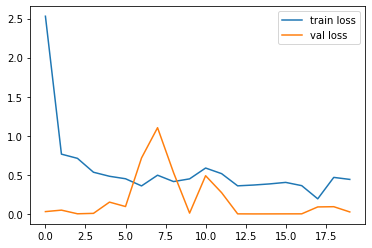

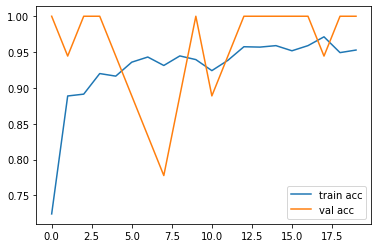

<Figure size 432x288 with 0 Axes>

In [16]:
# plot loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [17]:
# save the file as h5 type

from tensorflow.keras.models import load_model
model.save('/content/gdrive/My Drive/Colab Notebooks/Cotton Disease/model_inception.h5')

In [18]:
prediction=model.predict(testing_set)
prediction

array([[0.0000000e+00, 2.0592397e-13, 0.0000000e+00, 1.0000000e+00],
       [0.0000000e+00, 1.0000000e+00, 7.6272267e-35, 2.8947611e-26],
       [9.1839355e-17, 1.9163598e-10, 1.0000000e+00, 8.7984209e-22],
       [4.2847027e-13, 1.2878726e-03, 9.0036448e-03, 9.8970848e-01],
       [0.0000000e+00, 1.0000000e+00, 0.0000000e+00, 0.0000000e+00],
       [2.8215872e-16, 5.3442143e-29, 1.0000000e+00, 8.6688365e-34],
       [1.0000000e+00, 5.9575845e-28, 1.5802352e-21, 0.0000000e+00],
       [4.3853235e-23, 1.0729438e-07, 1.4244982e-17, 9.9999988e-01],
       [0.0000000e+00, 1.0000000e+00, 0.0000000e+00, 1.4241492e-34],
       [1.0000000e+00, 0.0000000e+00, 9.5171937e-25, 6.0463698e-29],
       [6.4120650e-01, 3.5879347e-01, 2.3205934e-18, 9.4313241e-19],
       [3.5268199e-27, 1.0000000e+00, 6.7491233e-22, 2.0163862e-12],
       [2.3263613e-18, 1.5397021e-19, 1.0000000e+00, 2.6342548e-13],
       [5.8551078e-16, 3.6321850e-20, 1.0000000e+00, 9.2835779e-18],
       [6.7797601e-35, 1.0000000e+

In [19]:
predictions=np.argmax(prediction,axis=1)
predictions

array([3, 1, 2, 3, 1, 2, 0, 3, 1, 0, 0, 1, 2, 2, 1, 3, 3, 2])

In [20]:
# loading model
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [21]:
model=load_model('/content/gdrive/My Drive/Colab Notebooks/Cotton Disease/model_inception.h5')

In [23]:
img=image.load_img('/content/gdrive/My Drive/Colab Notebooks/Cotton Disease/Cotton Dataset/test/fresh cotton plant/dsd (223).jpg',
                 target_size=(224,224))

In [24]:
x=image.img_to_array(img)
x

array([[[ 57., 138.,  18.],
        [ 55., 136.,  16.],
        [ 69., 142.,  25.],
        ...,
        [100., 158.,  81.],
        [106., 160.,  76.],
        [101., 155.,  77.]],

       [[ 69., 144.,  15.],
        [ 74., 150.,  28.],
        [ 64., 138.,  17.],
        ...,
        [143., 188.,  83.],
        [172., 199.,  84.],
        [107., 152.,  69.]],

       [[ 64., 139.,  10.],
        [ 51., 128.,   0.],
        [ 92., 167.,  40.],
        ...,
        [144., 185.,  57.],
        [130., 176.,  67.],
        [ 96., 149.,  57.]],

       ...,

       [[ 60.,  53.,  35.],
        [ 66.,  57.,  42.],
        [ 55.,  46.,  29.],
        ...,
        [ 70., 117.,  49.],
        [ 72., 122.,  49.],
        [ 76., 128.,  54.]],

       [[ 67.,  60.,  42.],
        [ 69.,  62.,  44.],
        [ 87.,  78.,  61.],
        ...,
        [ 77., 127.,  58.],
        [ 82., 132.,  61.],
        [ 74., 126.,  54.]],

       [[ 63.,  56.,  38.],
        [ 76.,  69.,  51.],
        [ 78.,  

In [25]:
x.shape

(224, 224, 3)

In [26]:
x=x/255

In [31]:
import numpy as np
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

In [32]:
model.predict(img_data)

array([[9.9999368e-01, 5.9349763e-06, 2.6700096e-07, 4.7053287e-08]],
      dtype=float32)

In [33]:
a=np.argmax(model.predict(img_data),axis=1)

In [34]:
a==1

array([False])

In [35]:
a==0

array([ True])